<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/ML07_C_MST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME**: SANJANA ASRANI

**DIV**: D17B

**ROLL NO.**: 01

#ML LAB-07-**Clustering using minimum spanning trees**



Minimum Spanning Tree Edges:
(0, 1, {'weight': 1.0})
(1, 2, {'weight': 1.0})
(2, 10, {'weight': 0.0})
(3, 4, {'weight': 1.4142135623730951})
(4, 5, {'weight': 1.4142135623730951})
(5, 17, {'weight': 0.0})
(6, 8, {'weight': 0.4242640687119289})
(7, 9, {'weight': 0.4242640687119289})
(8, 9, {'weight': 0.5656854249492372})
(12, 15, {'weight': 1.0})
(15, 16, {'weight': 1.0})


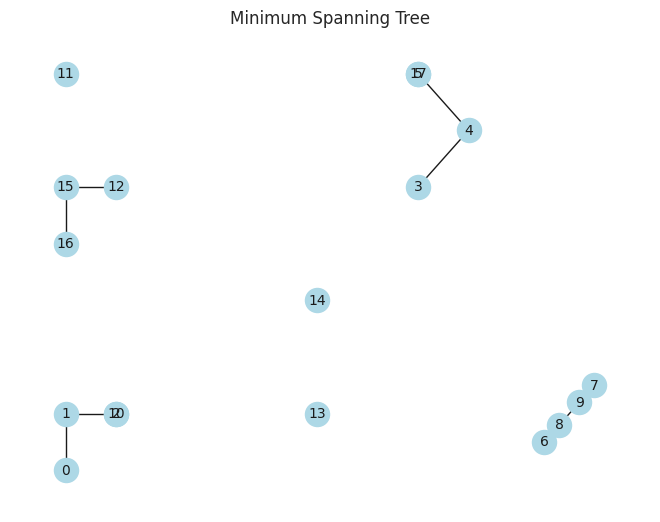

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generate sample data (you can replace this with your own dataset)
data = np.array([[1, 2],
                 [1, 3],
                 [2, 3],
                 [8, 7],
                 [9, 8],
                 [8, 9],
                 [10.5, 2.5], [11.5, 3.5], [10.8, 2.8], [11.2, 3.2],
                 [2, 3],
                 [1, 9],
                 [2, 7],
                 [6, 3],
                 [6, 5],
                 [1, 7],
                 [1, 6],
                 [8, 9],
                 ])

# Calculate pairwise distances and create a distance matrix
distances = np.linalg.norm(data[:, np.newaxis, :] - data, axis=2)

# Create a graph from the distance matrix
G = nx.Graph()

# Add nodes to the graph
num_nodes = len(data)
G.add_nodes_from(range(num_nodes))

# Add edges to the graph based on distances and print distances
# In this code, we'll add edges within a certain distance threshold (eps) to form clusters
eps = 1.5  # Adjust the epsilon value as needed
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        distance = distances[i][j]
        if distance <= eps:
            G.add_edge(i, j, weight=distance)

# Calculate the Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G)
# Print the MST edges
print("\nMinimum Spanning Tree Edges:")
for edge in mst.edges(data=True):
    print(edge)

# Visualize the MST (optional)
pos = {i: data[i] for i in range(num_nodes)}
nx.draw(mst, pos, with_labels=True, node_size=300, font_size=10, node_color='lightblue')
plt.title('Minimum Spanning Tree')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# matplotlib 1.4 + numpy 1.10 produces warnings; we'll filter these
import warnings; warnings.filterwarnings('ignore', message='elementwise')

def plot_mst(model, cmap='rainbow'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')

    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16);



In [ ]:
pip install mst_clustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mst_clustering: filename=mst_clustering-1.0-py3-none-any.whl size=7665 sha256=59af47717ff1d285db95a3f2085fa63f431a994577b0802ad597e86c70d791ef
  Stored in directory: /root/.cache/pip/wheels/9c/5a/5c/d27dee53c183bcf4e0c75115536cda670a1110d87d1e023f62
Successfully built mst_clustering


<ipython-input-3-981f9f63d15f>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


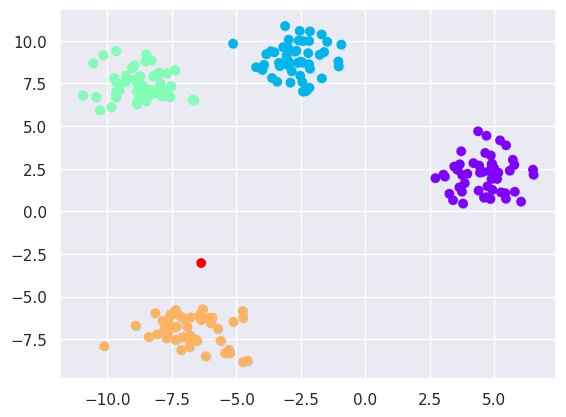

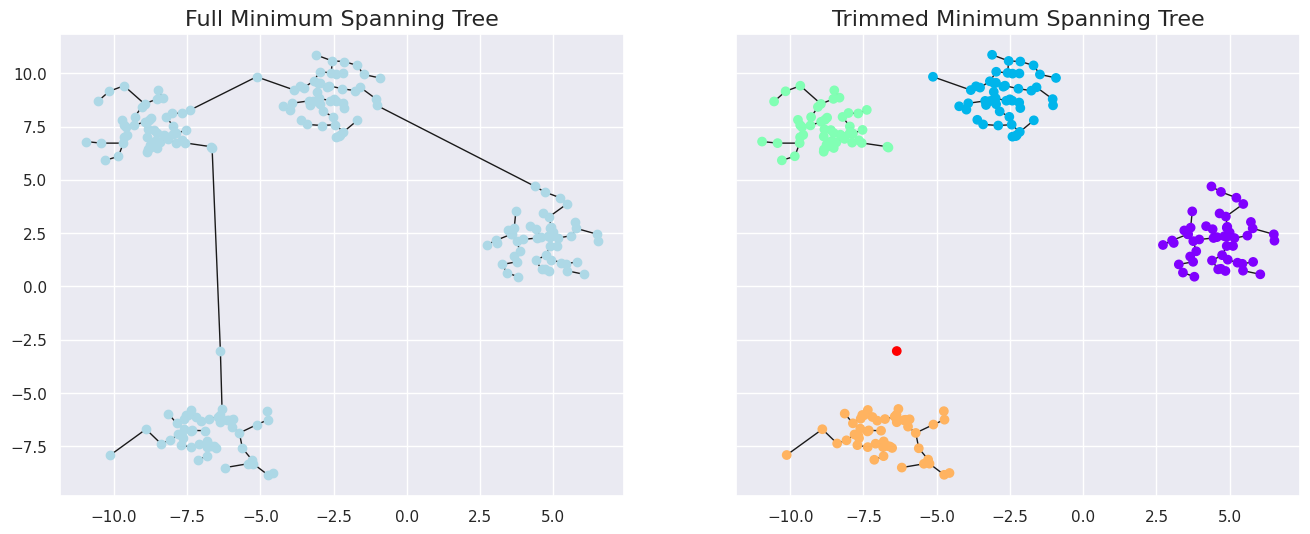

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, centers=4, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c='lightblue');

from mst_clustering import MSTClustering
model = MSTClustering(cutoff_scale=2, approximate=False)
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow');

plot_mst(model)


In [ ]:

rng = np.random.RandomState(int(100 * y[-1]))
noise = -14 + 28 * rng.rand(200, 2)

X_noisy = np.vstack([X, noise])
y_noisy = np.concatenate([y, np.full(200, -1, dtype=int)])

<ipython-input-12-386fcd49a3a4>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c='lightblue', cmap='spectral_r')


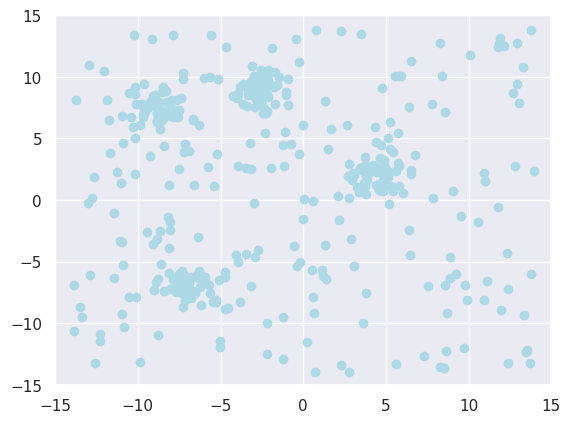

In [ ]:
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c='lightblue', cmap='spectral_r')
plt.xlim(-15, 15)
plt.ylim(-15, 15);


<ipython-input-3-981f9f63d15f>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


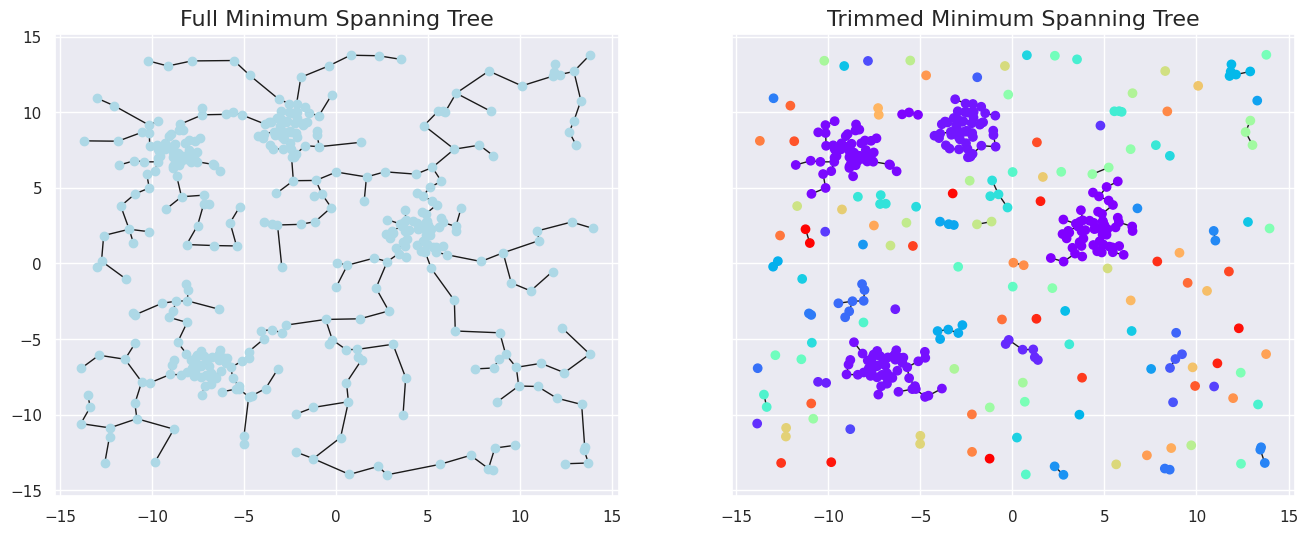

In [ ]:
noisy_model = MSTClustering(cutoff_scale=1)
noisy_model.fit(X_noisy)
plot_mst(noisy_model)

<ipython-input-3-981f9f63d15f>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


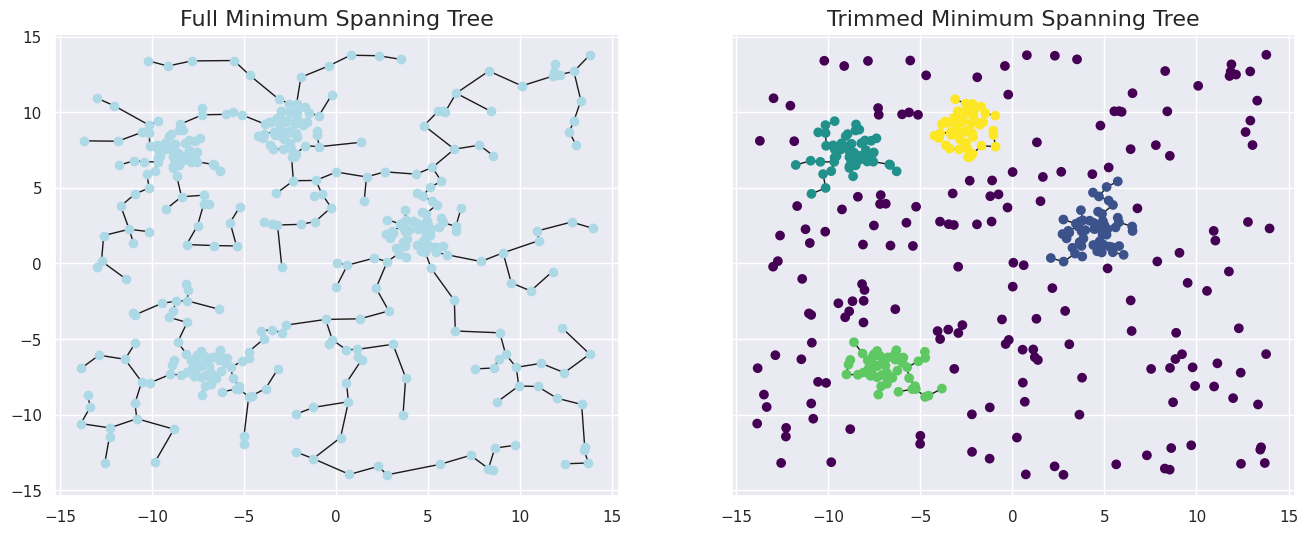

In [ ]:
noisy_model = MSTClustering(cutoff_scale=1, min_cluster_size=10)
noisy_model.fit(X_noisy)
plot_mst(noisy_model, cmap='viridis')


evaluation parameter: silhoutte

# **ASSESSMENT**

1. **Write the steps for MST algorithm**

*Kruskal's algorithm for finding the Minimum Spanning Tree:*

  1. **Initialize**: Start with an empty set to represent the MST.

  2. **Sort Edges**: Sort all edges in non-decreasing order of their weights.

  3. **Select Edge**: Take the edge with the smallest weight that does not create a cycle in the MST. Add it to the MST.

  4. **Repeat**: Continue selecting the next smallest edge that doesn't create a cycle until there are (n-1) edges in the MST, where n is the number of vertices.

  5. **Output**: The MST is complete and contains (n-1) edges with the minimum total weight.


---


2. **Explain in brief Agglomerative and Hierachical clustering algorithms**

  1. **Agglomerative Clustering**:

- **Type**: Bottom-up, hierarchical clustering method.
- **Process**: Starts with each data point as its own cluster and merges clusters iteratively, grouping the closest clusters together.
- **Distance Metric**: Requires a distance or similarity metric to determine cluster proximity.
- **Merging Criteria**: Common merging criteria include single linkage (minimum pairwise distance), complete linkage (maximum pairwise distance), and average linkage (average pairwise distance).
- **Dendrogram**: Represents the hierarchy of clusters as a tree-like structure (dendrogram), which can be cut at various levels to obtain clusters of different sizes.
- **Complexity**: Time complexity can be high for large datasets, especially with single linkage, but it can be more interpretable than some other methods.

  2. **Hierarchical Clustering**:

- **Type**: Top-down, hierarchical clustering method.
- **Process**: Starts with all data points in a single cluster and recursively divides clusters into smaller sub-clusters.
- **Distance Metric**: Requires a distance or similarity metric to determine cluster dissimilarity.
- **Dividing Criteria**: Common dividing criteria include minimizing the variance within clusters (divisive) or maximizing the similarity between clusters (agglomerative).
- **Hierarchy**: Represents the hierarchy of clusters as a tree-like structure, and each level of the hierarchy corresponds to a different partitioning of the data.
- **Interpretability**: Can provide a comprehensive view of the data's hierarchical structure but may be less straightforward to determine the number of clusters compared to some other methods.


---

